<a href="https://colab.research.google.com/github/LordLean/Machine-Learning/blob/master/Kaggle/0_061152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

In [2]:
# Make directory and copy.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#!pip install kaggle # Install kaggle.

# Change access permissions.
!chmod 600 /root/.kaggle/kaggle.json

#!kaggle datasets list # Lists kaggle datasets.

# Download using Kaggle API.
!kaggle competitions download -c brighton-a-memorable-city

# Unzip data
!unzip additional_training.csv
!unzip training.csv
!unzip testing.csv

# List files in dir.
# !ls

  0% 0.00/81.9k [00:00<?, ?B/s]
100% 81.9k/81.9k [00:00<00:00, 70.0MB/s]
  0% 0.00/30.0 [00:00<?, ?B/s]
100% 30.0/30.0 [00:00<00:00, 31.7kB/s]
  0% 0.00/1.65M [00:00<?, ?B/s]
100% 1.65M/1.65M [00:00<00:00, 111MB/s]
 97% 83.0M/85.7M [00:01<00:00, 72.9MB/s]
100% 85.7M/85.7M [00:01<00:00, 84.3MB/s]
 35% 5.00M/14.2M [00:00<00:00, 51.5MB/s]
100% 14.2M/14.2M [00:00<00:00, 90.5MB/s]
  0% 0.00/19.6k [00:00<?, ?B/s]
100% 19.6k/19.6k [00:00<00:00, 20.1MB/s]
Archive:  additional_training.csv.zip
  inflating: additional_training.csv  
Archive:  training.csv.zip
  inflating: training.csv            
Archive:  testing.csv.zip
  inflating: testing.csv             


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

from sklearn.utils import resample
from sklearn.utils import shuffle

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [0]:
train = pd.read_csv("/content/training.csv")
test = pd.read_csv("/content/testing.csv")
test_proportions = pd.read_csv("/content/test_proportions.csv")

Length match: True
Proportional Accuracy: 0.8309178743961353
   0    1
0  1   31
1  4  171


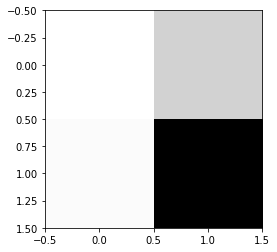

In [5]:
# Train on train, test on train[split].

split_spot = 40

train_split_train = train.iloc[:split_spot, 1:-1].to_numpy(copy=True)
train_pred_train = train.iloc[:split_spot, -1].to_numpy(copy=True)
print("Length match: {}".format(len(train_split_train) == len(train_pred_train)))

train_split_test = train.iloc[split_spot: ,1:-1].to_numpy(copy=True)
train_pred_test = train.iloc[split_spot: ,-1].to_numpy(copy=True)

X = train_split_train
y = train_pred_train 

clf = MLPClassifier(solver="lbfgs", alpha=1e-5, random_state=1)

clf.fit(X,y)

predictions = clf.predict(train_split_test)

accuracy = 0 

for i, (p1,p2) in enumerate(zip(predictions, train_pred_test)):
  if p1 == p2:
    accuracy += 1

print("Proportional Accuracy: {}".format(accuracy / len(predictions)))


conf = confusion_matrix(train_pred_test, predictions)
df = pd.DataFrame(conf)
print(df)

plt.imshow(conf, cmap="binary", interpolation="None")
#plt.axis("off")
plt.show()

In [0]:
# START--------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------

# ------ Set up observed predictions.

# Get all observed predictions 0 / 1.
train_observed = train.iloc[:, -1]
# .values()
y = train_observed.to_numpy(copy=True) 
# Throughout this notebook classifiers etc are fed numpy arrays. This was due to
# certain trial classifiers prefering np array to pd etc DataFrames.

Proportions
Training data:  Class0: 15.38%   Class1: 84.62%   Proportion: 0.1818 : 1
Testing data:   Class0: 61.52%   Class1: 38.48%   Proportion: 1.5988 : 1


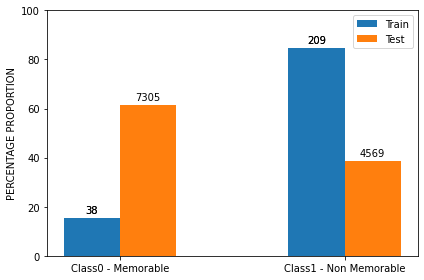

In [7]:
# Data representation:

# Training ---
trn_c0 = np.count_nonzero(y == 0)
trn_c1 = np.count_nonzero(y == 1)

autolabel_vals = [trn_c0,trn_c1] # Hold vals for rect labels.

trn_c0 = round((trn_c0/len(y)*100),2)
trn_c1 = round((trn_c1/len(y)*100),2)
trn_bar = [trn_c0,trn_c1] # Hold vals for bar plot.


# Testing ---
tst_c0 = float(test_proportions.iloc[0,0][:6])

# Hold vals for rect labels.
autolabel_vals.append(tst_c0*len(test))
autolabel_vals.append((1-tst_c0)*len(test))

tst_c0 = round((tst_c0*100),2)
tst_c1 = 100 - tst_c0
tst_bar = [tst_c0,tst_c1] # Hold vals for bar plot.


print("Proportions")
print("Training data:  Class0: {}%   Class1: {}%".format(trn_c0,trn_c1) +
      "   Proportion: {} : 1".format(round((trn_c0/trn_c1),4)))
print("Testing data:   Class0: {}%   Class1: {}%".format(tst_c0,tst_c1) + 
      "   Proportion: {} : 1".format(round((tst_c0/tst_c1),4)))


# Bar Plot.
labels = ["Class0 - Memorable", "Class1 - Non Memorable"]
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, trn_bar, width, label='Train')
rects2 = ax.bar(x + width/2, tst_bar, width, label='Test')

ax.set_ylabel("PERCENTAGE PROPORTION")
ax.set_ylim([0,100])
#ax.axes.get_yaxis().set_visible(False)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


xyz = []
############
'''https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html'''
def autolabel(rects):
  for i, rect in enumerate(rects):
    height = rect.get_height()
    xy=(rect.get_x() + rect.get_width() / 2, height)
    xyz.append(xy)
  for i, (coord, val) in enumerate(zip(xyz,autolabel_vals)):
    ax.annotate(s=round(val),
                xy=coord,
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
############


fig.tight_layout()

plt.show()

In [0]:
# Resampling.

minority = train.loc[train["prediction"] == 0]

num = len(train) - 2 * len(minority)

class0_upsampled = resample(minority,
                           replace=True,
                           n_samples=num,
                           random_state=25
                           )

# Concat new class0 sample and original train.
train = pd.concat([train, class0_upsampled])
# Shuffle.
train = shuffle(train)

# Update target array.

# Get all observed predictions 0 / 1.
train_observed = train.iloc[:, -1]
# .values()
y = train_observed.to_numpy(copy=True)

In [0]:
# ------ Set up training and testing data.

# Split standardizer by hand.
# Training data.
df_cnn = train.iloc[:, 1:-513]
df_gist = train.iloc[:, -513:-1]

X_cnn = df_cnn.to_numpy(copy=True)
X_gist = df_gist.to_numpy(copy=True)

# Testing data.
df_test_cnn = test.iloc[:,1:-512]
df_test_gist = test.iloc[:,-512:]

test_values_cnn = df_test_cnn.to_numpy(copy=True)
test_values_gist = df_test_gist.to_numpy(copy=True)


# Set scale method, not that it makes a ******* difference.
# Tho probabily should use SKLEARNs package.
# ACTUALLY SCRAP THAT SOMETHINGS BROKE AND NOW WE'RE STUCK ON 0.2948
scale_setting = 1

if scale_setting == 0:
  # Standardize training data.
  scaler = MinMaxScaler()
  X_cnn = scaler.fit_transform(X_cnn)
  test_values_cnn = scaler.transform(test_values_cnn)

  # Standardize training data.
  scaler = MinMaxScaler()
  X_gist = scaler.fit_transform(X_gist)
  test_values_gist = scaler.transform(test_values_gist)

elif scale_setting == 1:
  # Training scaling.
  mean = X_cnn.mean()
  std = X_cnn.std()

  X_cnn = (X_cnn - mean) / std
  test_values_cnn = (test_values_cnn - mean) / std

  # Testing scaling.
  mean = X_gist.mean()
  std = X_gist.std()

  X_gist = (X_gist - mean) / std
  test_values_gist = (test_values_gist - mean) / std


#Create final np arrays for training/test.
X_standardized = np.concatenate((X_cnn,X_gist),axis=1)
test_data_standardized = np.concatenate((test_values_cnn,test_values_gist),axis=1)

In [0]:
# Params:

X = X_standardized

test_data = test_data_standardized


hddn_lyrs = (100,100,100,100)
mx_itr = 100

# No diff so far.
lr = { "c" : 'constant', "i": 'invscaling', "a":'adaptive'}

In [0]:
# Classifier.
clf = MLPClassifier(solver="lbfgs",
                    hidden_layer_sizes=hddn_lyrs,
                    max_iter=mx_itr,
                    alpha=1e-5,
                    random_state=1,
                    learning_rate=lr["c"]
                    )

clf.fit(X,y)

# Predictions.
predictions_final = clf.predict(test_data)

In [12]:
# Calculate extremely rough "accuracy" from proportion of data correct.

class_0 = 0
class_1 = 0

for val in predictions_final:
  if val == 0:
    class_0 += 1
  elif val == 1:
    class_1 += 1

total = len(predictions_final)

pred_0 = round((class_0 / total), 4)
pred_1 = round((class_1 / total), 4) 

actual_0 = float(test_proportions.iloc[0,0][:6])
actual_1 = round((1 - actual_0),4)

dif = abs(pred_0 - actual_0)
percent_dif = dif / np.mean([pred_0,actual_0]) * 100

print("Class 0 Non memorable: \nPredicted proportion: {} \nActual proportion:    {}\n".format(pred_0,actual_0))
print("Class 1 Memorable: \nPredicted proportion: {} \nActual proportion:    {}\n".format(pred_1,actual_1))
print("Percentage difference pred_0 and actual_0 is:\n{}%\nDifference of:\n{}".format(round(percent_dif,2), round(dif,4)))

Class 0 Non memorable: 
Predicted proportion: 0.3343 
Actual proportion:    0.6152

Class 1 Memorable: 
Predicted proportion: 0.6657 
Actual proportion:    0.3848

Percentage difference pred_0 and actual_0 is:
59.17%
Difference of:
0.2809


In [0]:
# 0.6152 class 0      non memorable.
# 0.3848 class 1      memorable.

In [0]:
catch this cell

In [0]:
# Create and download .csv file.
rnge = np.arange(1,len(predictions_final)+1)
df = pd.DataFrame({"ID": rnge, "prediction": predictions_final})
df.to_csv("submission1.csv", index=False)

In [0]:
!ls

In [0]:
# Run to submit to Kaggle competition.
!kaggle competitions submit brighton-a-memorable-city -f submission1.csv -m "woo"

In [0]:
files.download("submission1.csv")

 <br>

In [0]:
# # Total Data.
# # Total Data.
# # Total Data.
# # Total Data.
# # Total Data.

# # Get all training values.
# train_values = train.iloc[:, 1:-1].to_numpy(copy=True)
# # Get all observed predictions.
# train_observed = train.iloc[:, -1].to_numpy(copy=True)
# # Compare to check equal length.
# print(len(train_values))
# print(len(train_observed))

# # Non-standardized Data
# X = train_values
# y = train_observed 

# # Values to test on.
# test_values = test.iloc[:,1:].to_numpy(copy=True)

# # Classifier.
# clf = MLPClassifier(solver="lbfgs", hidden_layer_sizes=(100,), max_iter=200, alpha=1e-5, random_state=1)

# clf.fit(X,y)

# # Predictions.
# predictions_final = clf.predict(test_values)

In [0]:
# pca = PCA(n_components=2)

# principalComponents = pca.fit_transform(X)

# principalDf = pd.DataFrame(data=principalComponents, columns=["PC1","PC2"])

# finalDf = pd.concat([principalDf, train.iloc[:, -1]], axis = 1)

# print(finalDf)


# labels=train.iloc[:, -1]
# cdict={0:'red',1:'green'}
# labl={0:'class0',1:'class1'}
# marker={0:'*',1:'o'}
# alpha={0:1, 1:.5}
# fig,ax=plt.subplots(figsize=(7,5))
# fig.patch.set_facecolor('white')
# for l in np.unique(labels):
#  ax.scatter(finalDf["PC1"],finalDf["PC2"],c=cdict[l],s=40,
#            label=labl[l],marker=marker[l],alpha=alpha[l])
# # for loop ends
# plt.xlabel("First Principal Component",fontsize=14)
# plt.ylabel("Second Principal Component",fontsize=14)
# plt.legend()
# plt.show()
# # please check the scatter plot of the remaining component and you will understand the difference

In [0]:
#### GROUPED TWIN AXIS BAR PLOT

# # Data representation:

# # Training ---
# trn_c0 = np.count_nonzero(y == 0)
# trn_c1 = np.count_nonzero(y == 1)

# plsdeleteAFTER = [trn_c0,trn_c1] #########
# autolabel_vals = [trn_c0,trn_c1] # Hold vals for rect labels.

# trn_c0 = round((trn_c0/len(y)*100),2)
# trn_c1 = round((trn_c1/len(y)*100),2)
# trn_bar = [trn_c0,trn_c1] # Hold vals for bar plot.


# # Testing ---
# tst_c0 = float(test_proportions.iloc[0,0][:6])

# # Hold vals for rect labels.
# autolabel_vals.append(tst_c0*len(test))
# autolabel_vals.append((1-tst_c0)*len(test))
# plsdeleteAFTER = [tst_c0*len(test),(1-tst_c0)*len(test)] #####

# tst_c0 = round((tst_c0*100),2)
# tst_c1 = 100 - tst_c0
# tst_bar = [tst_c0,tst_c1] # Hold vals for bar plot.


# print("Proportions")
# print("Training data:  Class0: {}%   Class1: {}%".format(trn_c0,trn_c1) +
#       "   Proportion: {} : 1".format(round((trn_c0/trn_c1),4)))
# print("Testing data:   Class0: {}%   Class1: {}%".format(tst_c0,tst_c1) + 
#       "   Proportion: {} : 1".format(round((tst_c0/tst_c1),4)))


# # Bar Plot.
# labels = ["Class0 - Memorable", "Class1 - Non Memorable"]
# x = np.arange(len(labels))
# width = 0.25

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, trn_bar, width, label='Train')
# rects2 = ax.bar(x + width/2, tst_bar, width, label='Test')

# colour = "tab:blue"
# ax.set_ylabel("TRAINING DATA", color=colour)
# ax.set_ylim([0,100])
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# ax2 = ax.twinx()
# colour = "tab:orange"
# ax2.set_ylabel("TESTING DATA", color=colour)
# ax2.tick_params(axis="y", color=colour)

# ############
# # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
# def autolabel(rects):
#   for i, rect in enumerate(rects):
#     height = rect.get_height()
#     ax.annotate('{}%'.format(height),
#                 xy=(rect.get_x() + rect.get_width() / 2, height),
#                 xytext=(0, 3),  # 3 points vertical offset
#                 textcoords="offset points",
#                 ha='center', va='bottom')
# ############


# autolabel(rects1)
# autolabel(rects2)

# fig.tight_layout()

# plt.show()